In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import seaborn as sns
import clean1

##### Read in Raw Data

In [2]:
raw = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col=0 )

In [3]:
raw.reset_index(inplace=True)

In [4]:
raw.head()

,index,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


#### Test Train Split

In [5]:
from sklearn.model_selection import train_test_split

X = raw.drop('SalePrice', axis=1)
y = raw.SalePrice

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=7)

#### Run Clean script to deal with missingness

In [6]:
Xtrain_c = clean1.clean(Xtrain.copy())
#Xtest_c = clean1.clean(Xtest) # for Xtest as well

### Removing outliers in GrLivArea (2 data points > 5 std ~3936)

In [7]:
Xtrain_c.head()
#Xtrain_c.shape

,index,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,998,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,382,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal
1077,78,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,417,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal
1377,378,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal


In [8]:
# Removing outliers in GrLivArea (2 data points > 5 std ~3936)

threshold = (np.mean(Xtrain_c.GrLivArea) + 5*np.std(Xtrain_c.GrLivArea))
idx = Xtrain_c[Xtrain_c.GrLivArea > threshold].index
idx

Int64Index([1007, 309], dtype='int64')

In [9]:
Xtrain_c.drop(idx, inplace=True)
ytrain.drop(idx, inplace=True)

In [10]:
Xtrain_c.shape

(2062, 80)

In [11]:
Xtrain_c.drop('index', axis=1, inplace=True)

In [12]:
Xtrain_c.head()

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
997,1728,90,RL,98.00000,13260,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,6,1962,2001,Hip,CompShg,HdBoard,HdBoard,BrkFace,144.0,3,3,CBlock,3,3,No,BLQ,1500.0,Unf,0.0,228.0,1728.0,GasA,3,Y,SBrkr,1728,0,0,2.0,0.0,2,0,6,2,3,10,Typ,0,0,None,1977.5,None,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,None,None,0,1,2010,Oth,Abnorml
381,1262,20,RL,80.00000,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,5,Y,SBrkr,1262,0,0,0.0,1.0,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2.0,460.0,3,3,Y,298,0,0,0,0,0,0,None,None,0,5,2007,WD,Normal
1077,1086,80,RL,85.00000,13400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,3,3,CBlock,3,3,Av,ALQ,516.0,BLQ,128.0,380.0,1024.0,GasA,3,Y,SBrkr,1086,0,0,1.0,0.0,1,0,3,1,3,6,Typ,1,4,Attchd,1966.0,RFn,2.0,484.0,3,3,Y,0,0,0,0,0,0,0,GdWo,None,0,6,2006,WD,Normal
416,2582,60,RL,74.00000,11002,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,1048.0,Unf,0.0,341.0,1389.0,GasA,5,Y,SBrkr,1411,1171,0,1.0,0.0,2,1,4,1,4,9,Typ,1,3,Attchd,1998.0,Fin,3.0,758.0,3,3,Y,286,60,0,0,0,0,0,None,None,0,1,2007,WD,Normal
1377,1652,20,RL,68.62847,22002,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1959,1991,Gable,CompShg,MetalSd,MetalSd,BrkFace,136.0,3,4,CBlock,3,3,Mn,ALQ,1386.0,Unf,0.0,206.0,1592.0,GasA,4,Y,SBrkr,1652,0,0,1.0,0.0,1,1,3,1,4,6,Typ,1,4,Attchd,1959.0,RFn,2.0,510.0,3,3,Y,0,0,0,0,201,0,0,None,None,0,7,2007,WD,Normal


# Define Categorical and Numerical Features

In [ ]:
def cat_num_group(df):
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = df.select_dtypes(include=['int64','float64']).columns

    # Categorical Features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = cat_num_group(Xtrain_c)

# Boxplot to look at Categorical features

In [ ]:
data = pd.concat([Xtrain_c, ytrain], axis=1)
data.head()

In [ ]:
f = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

#### Grouping the categories based off boxplots above

In [ ]:
# Second cleaning grouping the categories
Xtrain_c2 = clean1.clean_category_var(Xtrain_c.copy())

In [ ]:
Xtrain_c2.head()

## Prepping data for R AIC BIC stepwise

In [ ]:
# changing yr features to age

Xtrain_c3 = clean1.transform_age(Xtrain_c2).drop(['YearRemodAdd','YearBuilt'], axis=1).copy()

In [ ]:
Xtrain_c3.head()

#### adding y column back to Xtrain

In [ ]:
rdata = pd.concat([Xtrain_c3, ytrain], axis=1).drop('index', axis=1)

In [ ]:
rdata.head()

In [ ]:
# write to csv
#rdata.to_csv("./data/cleanforR.csv",index_label = False)

#### Write csv of dummified features

In [ ]:
# dummify and drop first
Xtrain_dr = pd.get_dummies(Xtrain_c3, drop_first=True)

In [ ]:
rddata = pd.concat([Xtrain_dr, ytrain], axis=1).drop('index', axis=1)

In [ ]:
rddata = rddata.drop(['OverallQual','OverallCond'], axis=1)

In [ ]:
# write to csv

#rddata.to_csv("./data/cleanforRd.csv",index_label = False)

# Grid search CV Lasso

#### Dummify 

In [ ]:
Xtrain_d = pd.get_dummies(Xtrain_c2, drop_first=True)


In [ ]:
Xtrain_d.shape

In [ ]:
ytrain.shape

# grid search cv

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(normalize=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_param = [{'alpha': list(np.linspace(1e-4, 100, 100))}] # key of dictionary is parameter, value is range of values of hyperparameter
grid = GridSearchCV(estimator=lasso, param_grid=grid_param, cv=5, return_train_score=True,)
grid.fit(Xtrain_d, ytrain)

In [ ]:
grid.best_estimator_

In [ ]:
lasso2 = Lasso(normalize=True, alpha=2.0203)
lasso2.fit(Xtrain_d, ytrain) # fit data

In [ ]:
coef = pd.Series(lasso2.coef_, index = Xtrain_d.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### This time with target log transformed

In [13]:
# log transform target
ytrainlog=np.log(ytrain)

In [ ]:
lasso3 = Lasso(normalize=True, alpha=1e-4)
lasso3.fit(Xtrain_d, ytrainlog)

In [ ]:
lasso3.score_(ytest, ytrain)

In [ ]:
coef = pd.Series(lasso3.coef_, index = Xtrain_d.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Log Price Lasso Model")

## Creating model from AIC BIC insights
- start with cleaning and reformatting data

In [ ]:
# first cleaning done above
Xtrain_insight = Xtrain_c.copy()

In [ ]:
# log price from above section Grid Search Lasso
# ytrainlog

#### Make total Area Feature and Drop all other Area Features

In [ ]:
Xtrain_insight.head()

In [ ]:
# Hashed so doesnt run again but important
Xtrain_insight['TotalArea'] = Xtrain_insight['GrLivArea'] + Xtrain_insight['TotalBsmtSF'] + Xtrain_insight['GarageArea']

In [ ]:
Xtrain_insight.head()

In [ ]:
# house_area_col=['GrLivArea','MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'PoolArea', 'TotalArea']
# Xtrain_insight.drop(house_area_col, axis=1, inplace=True)
# Xtrain_insight.shape

In [ ]:
Xtrain_insight.filter(regex='Bath').columns

In [ ]:
# changing yr features to age

Xtrain_insight = clean1.transform_age(Xtrain_insight).drop(['YearRemodAdd','YearBuilt'], axis=1)

In [ ]:
# Adding all bathrooms together

Xtrain_insight['TotalBath'] = Xtrain_insight['HalfBath']/2 + Xtrain_insight['BsmtFullBath'] + Xtrain_insight['BsmtHalfBath']/2 + Xtrain_insight['FullBath']

In [ ]:
# Change wood deck to has or doesn't
Xtrain_insight['HasDeck'] = np.where(Xtrain_insight['WoodDeckSF']==0, 0, 1)
Xtrain_insight['NoPorch'] = Xtrain_insight.OpenPorchSF + Xtrain_insight.EnclosedPorch + Xtrain_insight['3SsnPorch'] + Xtrain_insight.ScreenPorch
Xtrain_insight['NoPorch'] = np.where(Xtrain_insight['NoPorch']==0, 1, 0)

In [ ]:
Xtrain_insight.loc[Xtrain_insight.WoodDeckSF == 0].shape

In [ ]:
Xtrain_insight.head()

In [ ]:
Xtrain_insight.loc[Xtrain_insight.NoPorch != 0].shape

In [ ]:
Xtrain_insight.BldgType.value_counts()

In [ ]:
# HouseStyle change to 1story vs rest
Xtrain_insight['MultStory'] = np.where(Xtrain_insight['HouseStyle']=='1Story', 0, 1)

In [ ]:
# SaleCondition change to Partial Vs Rest
Xtrain_insight['PartialSale'] = np.where(Xtrain_insight['SaleCondition']=='Partial', 1, 0)

In [ ]:
# Paved Driveway
Xtrain_insight['PavedDrive'] = np.where(Xtrain_insight['PavedDrive']=='Y', 1, 0)

In [ ]:
Xtrain_insight['Neighborhood'] = np.where(Xtrain_insight['Neighborhood'].isin(['GrnHill', 'Greens', 'NridgHt', 'StoneBr', 'Veenker', 'Somerst',
       'Timber', 'CollgCr', 'Blmngtn']), "Tier_1", np.where(Xtrain_insight['Neighborhood'].isin(['Blmngtn', 'NoRidge', 'Mitchel', 'ClearCr',
       'Blueste', 'Sawyer', 'Crawfor', 'SawyerW', 'Gilbert', 'NPkVill']), "Tier_2", "Tier_3"))

In [ ]:
Xtrain_insight.columns

In [ ]:
column_names = ['TotalArea','LotArea','Neighborhood','BldgType','ExterQual','BsmtQual','Heating','HeatingQC','CentralAir','BedroomAbvGr','KitchenQual','Fireplaces','GarageCars','GarageQual','PavedDrive','RemodelAge','HouseAge','TotalBath','HasDeck', 'NoPorch', 'MultStory', 'PartialSale']
Xtrain_i = Xtrain_insight[column_names].copy()

In [ ]:
Xtrain_i['TotalArea'] = np.log(Xtrain_i['TotalArea'].copy())

In [ ]:
Xtrain_i.head()

In [ ]:
rdata_i = pd.concat([Xtrain_i, ytrainlog], axis=1)

In [ ]:
rdata_i.head()

In [ ]:
rdata_i.to_csv("./data/cleanforR_i.csv",index_label = False)

In [ ]:
SalePrice ~ TotalArea + RemodelAge + Neighborhood + 
    Fireplaces + CentralAir + KitchenQual + TotalBath + BldgType + 
    ExterQual + PavedDrive + MultStory + LotArea + HouseAge + 
    Exterior1st + HeatingQC + PartialSale + BedroomAbvGr + GarageQual,

In [ ]:
TotalArea + ExterQual + RemodelAge + 
    Fireplaces + HouseAge + BldgType + TotalBath + KitchenQual + 
    Neighborhood + CentralAir + LotArea + PavedDrive + MultStory + 
    PartialSale + HeatingQC + BedroomAbvGr

### Now build multiple linear model

In [ ]:
# create new Xtrain
column_names = ['TotalArea','Neighborhood','BldgType','ExterQual','BsmtQual','HeatingQC','CentralAir','BedroomAbvGr','KitchenQual','Fireplaces','GarageQual','PavedDrive','HouseAge','TotalBath', 'MultStory', 'PartialSale']
Xtrain_lm = Xtrain_insight[column_names].copy()

In [ ]:
# then dummify
Xtrain_lmd = pd.get_dummies(Xtrain_lm, drop_first=True)

In [ ]:
Xtrain_lmd.head()

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain_lmd, ytrainlog)

In [ ]:
lm.score(Xtrain_lmd, ytrainlog)

In [ ]:
lm.score(Xtrain_lmd, ytrainlog)

667     11.883109
362     12.034691
217     12.752673
2370    11.512925
1693    11.941456
Name: SalePrice, dtype: float64

### Using j_clean script

In [67]:
Xtrain_j = clean1.j_model_clean(Xtrain_c.copy())

In [16]:
Xtest_c = clean1.clean(Xtest.copy())
ytestlog = np.log(ytest)

In [19]:
Xtest_j = clean1.j_model_clean(Xtest_c.copy())

In [68]:
Xtrain_jd = pd.get_dummies(Xtrain_j, drop_first=True)

In [29]:
Xtest_jd = pd.get_dummies(Xtest_j, drop_first=True)

In [69]:
Xtrain_jd.head()

,TotalArea,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,Fireplaces,GarageQual,PavedDrive,HouseAge,TotalBath,MultStory,PartialSale,Neighborhood_Tier_2,Neighborhood_Tier_3,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y
997,8.147867,3,3,3,6,3,0,0,1,48,4.0,0,0,0,1,0,1,0,0,1
381,8.001020,3,4,5,3,3,1,3,1,31,2.5,0,0,0,0,0,0,0,0,1
1077,7.860956,3,3,3,3,3,1,3,1,40,2.0,1,0,0,1,0,0,0,0,1
416,8.461469,4,4,5,4,4,1,3,1,9,3.5,1,0,1,0,0,0,0,0,1
1377,8.230577,3,3,4,3,4,1,3,1,48,2.5,0,0,0,1,0,0,0,0,1


In [23]:
Xtest_d.head()

,TotalArea,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,Fireplaces,GarageQual,PavedDrive,HouseAge,TotalBath,MultStory,PartialSale,Neighborhood_Tier_2,Neighborhood_Tier_3,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y
667,7.868637,3,3,5,2,3,1,3,1,55,2.0,0,0,1,0,0,0,0,0,1
362,7.722235,3,4,4,3,3,1,3,1,14,2.5,1,0,1,0,0,0,0,0,1
217,8.550241,4,4,5,2,4,1,3,1,0,3.5,0,1,0,0,0,0,0,0,1
2370,7.458186,3,3,3,2,3,0,3,1,35,2.5,1,0,0,1,0,0,1,0,1
1693,7.999343,3,5,5,2,3,0,3,1,8,3.0,0,0,1,0,0,0,0,1,1


### Fitting multiple linear regression

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Xtrain_jd, ytrainlog)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
lm.score(Xtrain_jd, ytrainlog)

0.8722437737426657

In [26]:
lm.score(Xtest_jd, ytestlog)

0.8205166333254057

In [52]:
for ftname, beta in zip(Xtrain_jd.columns, lm.coef_):
    print(f"{ftname} >> {beta}")

TotalArea >> 0.6145028010241987
ExterQual >> 0.07296915734625387
BsmtQual >> -0.009100811770245965
HeatingQC >> 0.015044642769668772
BedroomAbvGr >> -0.01601920648887351
KitchenQual >> 0.07699386644263051
Fireplaces >> 0.076751919531075
GarageQual >> -0.008523139862774302
PavedDrive >> 0.04651427514861074
HouseAge >> -0.0010336365163751834
TotalBath >> 0.05710531047917034
MultStory >> 0.03252599936895902
PartialSale >> 0.06702855252834856
Neighborhood_Tier_2 >> -0.027604724251852085
Neighborhood_Tier_3 >> -0.08984491556670614
BldgType_2fmCon >> -0.043478622114419115
BldgType_Duplex >> -0.11779296427221554
BldgType_Twnhs >> -0.14145720464640515
BldgType_TwnhsE >> -0.08285457381116253
CentralAir_Y >> 0.09313701656623616


#### CV scores for more accuracy

In [32]:
from sklearn.model_selection import cross_val_score

In [92]:
cv3_train=(cross_val_score(lm, Xtrain_jd, ytrainlog, cv=3))

In [93]:
cv3_train

array([0.86121761, 0.86588018, 0.87423923])

### MEAN AND SD jmodel CV

In [94]:
np.mean(cv3_train)

0.8671123412139803

In [95]:
np.std(cv3_train)

0.005386979937965986

#### Can we make the model even simpler?

In [40]:
from sklearn.linear_model import Lasso

In [54]:
lasso = Lasso(normalize=True, alpha=1e-4)
lasso.fit(Xtrain_jd, ytrainlog)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 1.0, 'Feature importance Lasso JModel')

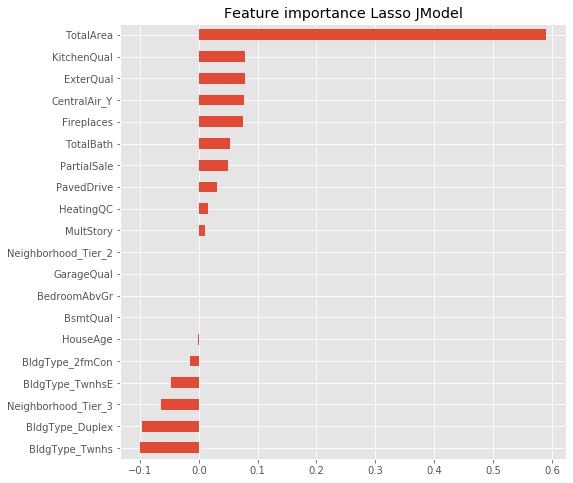

In [84]:
coef = pd.Series(lasso.coef_, index = Xtrain_jd.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance Lasso JModel")

In [57]:
Xtrain_jd.head()

,TotalArea,ExterQual,BsmtQual,HeatingQC,BedroomAbvGr,KitchenQual,Fireplaces,GarageQual,PavedDrive,HouseAge,TotalBath,MultStory,PartialSale,Neighborhood_Tier_2,Neighborhood_Tier_3,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_Y
997,8.147867,3,3,3,6,3,0,0,1,48,4.0,0,0,0,1,0,1,0,0,1
381,8.001020,3,4,5,3,3,1,3,1,31,2.5,0,0,0,0,0,0,0,0,1
1077,7.860956,3,3,3,3,3,1,3,1,40,2.0,1,0,0,1,0,0,0,0,1
416,8.461469,4,4,5,4,4,1,3,1,9,3.5,1,0,1,0,0,0,0,0,1
1377,8.230577,3,3,4,3,4,1,3,1,48,2.5,0,0,0,1,0,0,0,0,1


In [101]:
Xtrain_jgen= Xtrain_jd.drop(Xtrain_jd.iloc[:, 13:20], axis = 1)
Xtest_jgen= Xtest_jd.drop(Xtest_jd.iloc[:, 13:20], axis = 1)

In [108]:
lm_gen = LinearRegression()
cv3_train_jgen=(cross_val_score(lm_gen, Xtrain_jgen, ytrainlog, cv=3))

In [97]:
cv3_train_jgen

array([0.8471167 , 0.85212359, 0.85571187])

### MEAN AND SD jgen CV

In [98]:
np.mean(cv3_train_jgen)

0.8516507210863479

In [99]:
np.std(cv3_train_jgen)

0.0035248589405199567

In [82]:
lm_gen.fit(Xtrain_jgen, ytrainlog)
lm_gen.score(Xtest_jgen, ytestlog)

0.8118791790543877

In [85]:
lasso_gen = Lasso(normalize=True, alpha=1e-4)
lasso_gen.fit(Xtrain_jgen, ytrainlog)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Text(0.5, 1.0, 'Feature importance Lasso JgenModel')

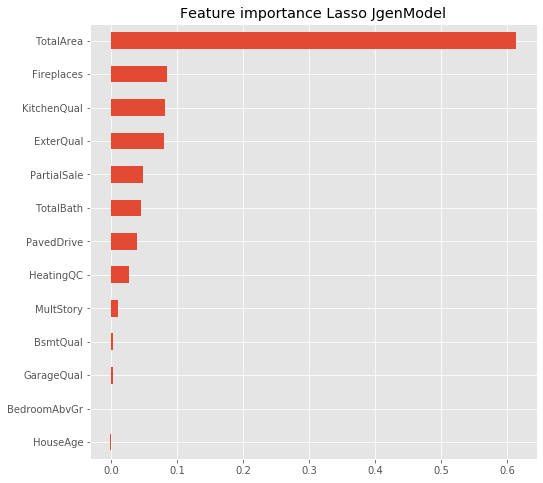

In [87]:
coef = pd.Series(lasso_gen.coef_, index = Xtrain_jgen.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 8.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance Lasso JgenModel")

### Price by sqft - takeaway is the model becomes very unstable, will need to add more features

In [102]:
Xtrain_jarea = Xtrain_jgen.drop('TotalArea', axis = 1)
Xtest_jarea = Xtest_jgen.drop('TotalArea', axis = 1)

In [105]:
ytrain_jarea = ytrainlog/(Xtrain_jgen['TotalArea'])
ytest_jarea = ytestlog/(Xtrain_jgen['TotalArea'])

In [104]:
ytrain_area.head()

997     1.392908
381     1.513433
1077    1.524320
416     1.499014
1377    1.483015
dtype: float64

In [109]:
lm_area = LinearRegression()
cv3_train_jarea=(cross_val_score(lm_area, Xtrain_jarea, ytrain_jarea, cv=3))

In [110]:
cv3_train_jarea

array([0.32892253, 0.2285782 , 0.28896176])